<a href="https://colab.research.google.com/github/berbir12/ML-Regression/blob/main/CarPricePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
data = pd.read_csv("/content/daTA.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
data.shape

(301, 9)

In [10]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [16]:
print(data.Fuel_Type.value_counts())
print(data.Transmission.value_counts())
print(data.Seller_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [19]:
data.replace({"Fuel_Type": {"Petrol": "0","CNG": "1", "Diesel": "2" }}, inplace=True)
data.replace({"Seller_Type": {"Dealer": "0","Individual": "1"}}, inplace=True)
data.replace({"Transmission": {"Manual": "0","Automatic": "1"}}, inplace=True)

In [21]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,2,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,2,0,0,0


In [23]:
X = data.drop(["Car_Name", "Selling_Price"], axis = 1)
Y = data["Selling_Price"]

In [24]:
print(X)

     Year  Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  Owner
0    2014           5.59       27000         0           0            0      0
1    2013           9.54       43000         2           0            0      0
2    2017           9.85        6900         0           0            0      0
3    2011           4.15        5200         0           0            0      0
4    2014           6.87       42450         2           0            0      0
..    ...            ...         ...       ...         ...          ...    ...
296  2016          11.60       33988         2           0            0      0
297  2015           5.90       60000         0           0            0      0
298  2009          11.00       87934         0           0            0      0
299  2017          12.50        9000         2           0            0      0
300  2016           5.90        5464         0           0            0      0

[301 rows x 7 columns]


In [25]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

In [28]:
linReg = LinearRegression()

In [29]:
linReg.fit(X_train, Y_train)

LinearRegression()

In [30]:
train_data_pred = linReg.predict(X_train)

In [31]:
error_score = metrics.r2_score(Y_train, train_data_pred)
print("R Squared Error: ", error_score)

R Squared Error:  0.8822863518024521


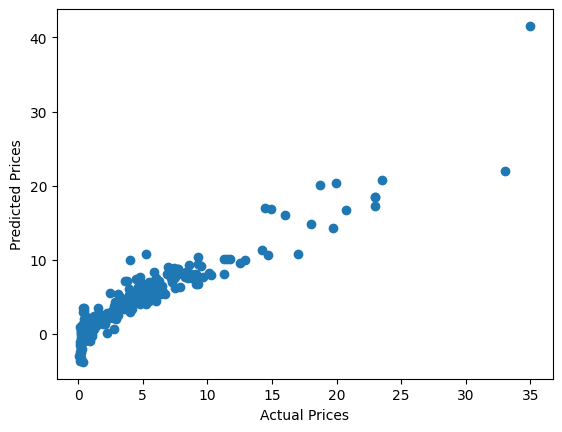

In [32]:
plt.scatter(Y_train, train_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

In [36]:
test_data_pred = linReg.predict(X_test)

In [39]:
error_score = metrics.r2_score(Y_test,test_data_pred)
print("R Squared Error: ", error_score)

R Squared Error:  0.8652448726845181


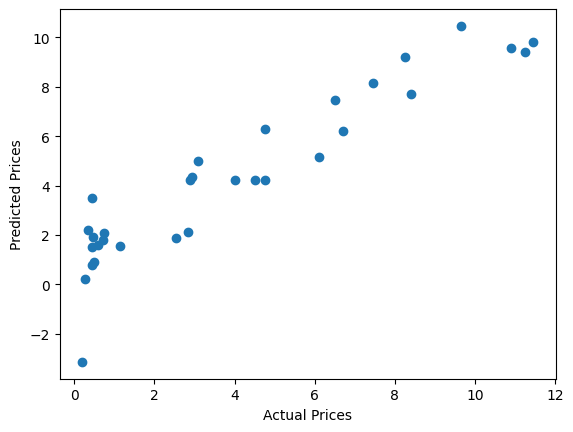

In [40]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

In [41]:
lassoReg = Lasso()

In [42]:
lassoReg.fit(X_train, Y_train)

Lasso()

In [44]:
train_data_pred = lassoReg.predict(X_train)

In [45]:
error_score = metrics.r2_score(Y_train, train_data_pred)
print("R Squared Error: ", error_score)

R Squared Error:  0.8427856123435794


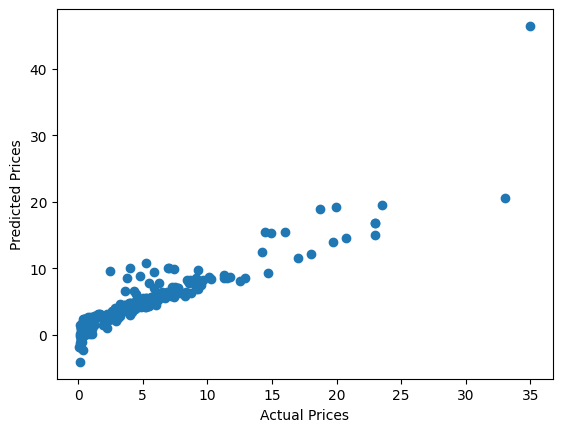

In [46]:
plt.scatter(Y_train, train_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

In [47]:
test_data_pred = lassoReg.predict(X_test)

In [48]:
error_score = metrics.r2_score(Y_test,test_data_pred)
print("R Squared Error: ", error_score)

R Squared Error:  0.8709167941173195


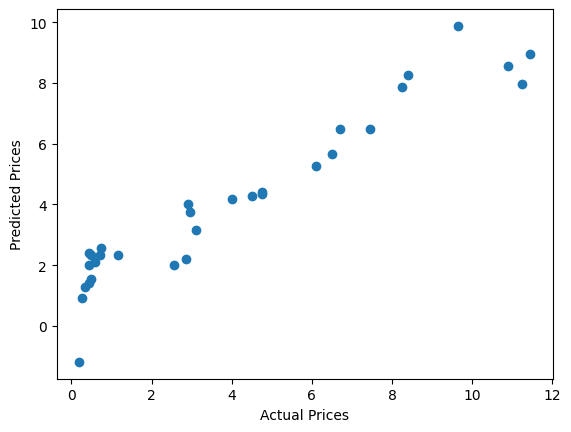

In [49]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()